In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/tensor flow jose/TF_2_Notebooks_and_Data/DATA/lending_club_info.csv')

In [ ]:
data.head()

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade


In [ ]:
real_data=pd.read_csv('/content/drive/MyDrive/tensor flow jose/TF_2_Notebooks_and_Data/DATA/lending_club_loan_two.csv')

In [ ]:
real_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
real_data['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


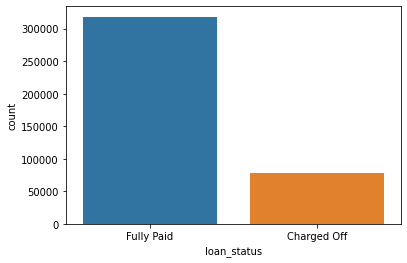

In [ ]:
sns.countplot('loan_status',data=real_data)

In [ ]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
objects=[]
for i in real_data.columns:
  if pd.api.types.is_object_dtype(real_data[i].values):
    objects.append(i)
    

In [ ]:
len(objects)

15

In [ ]:
not_objects=[]
for i in real_data.columns:
  if not pd.api.types.is_object_dtype(real_data[i].values):
    not_objects.append(i)

In [ ]:
len(not_objects)

12

In [ ]:
real_data.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [ ]:
missing_objects=[]
for i in real_data.columns:
  if real_data[i].isna().sum() !=0:
    missing_objects.append(i)


In [ ]:
missing_objects

['emp_title',
 'emp_length',
 'title',
 'revol_util',
 'mort_acc',
 'pub_rec_bankruptcies']

In [ ]:
for i in missing_objects:
  print(real_data[i].dtype)

object
object
object
float64
float64
float64


In [ ]:
real_data.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


In [ ]:
not_objects

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


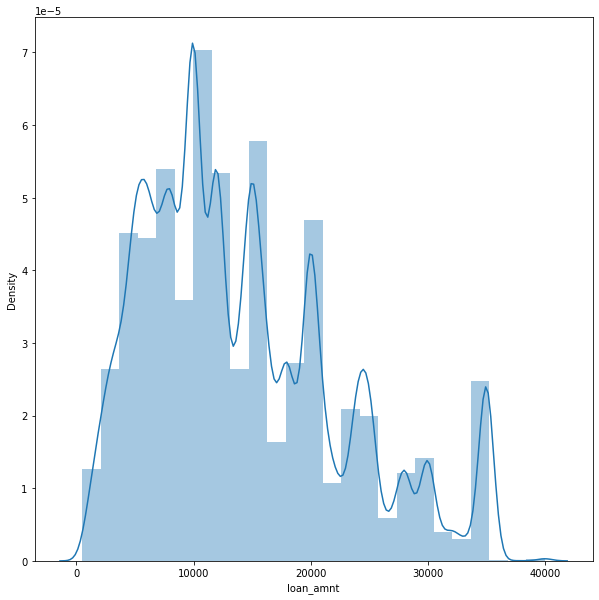

In [ ]:

plt.figure(figsize=(10,10))
sns.distplot(real_data['loan_amnt'],bins=25,)

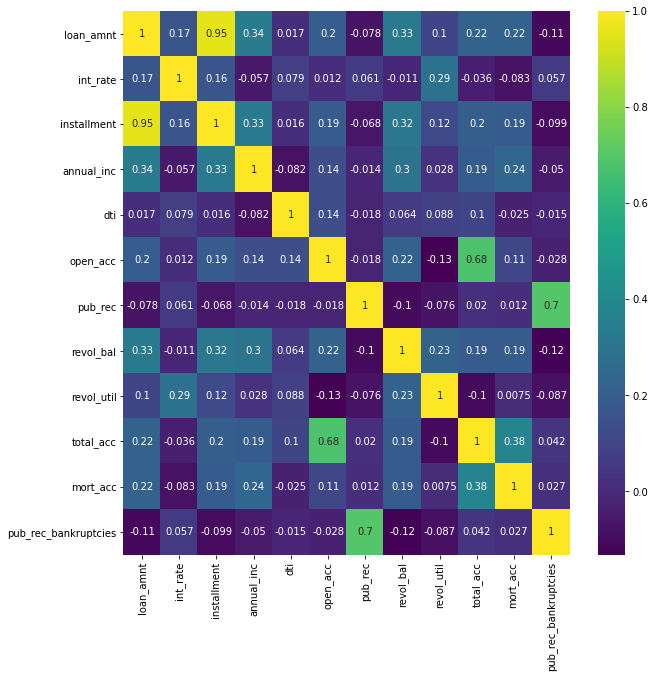

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(real_data.corr(),annot=True,cmap='viridis')

In [ ]:
data.set_index(data['LoanStatNew'],inplace=True)

In [ ]:
data.T.drop('LoanStatNew',axis=0,inplace=True)

In [ ]:
data.T['installment']

LoanStatNew                                          installment
Description    The monthly payment owed by the borrower if th...
Name: installment, dtype: object

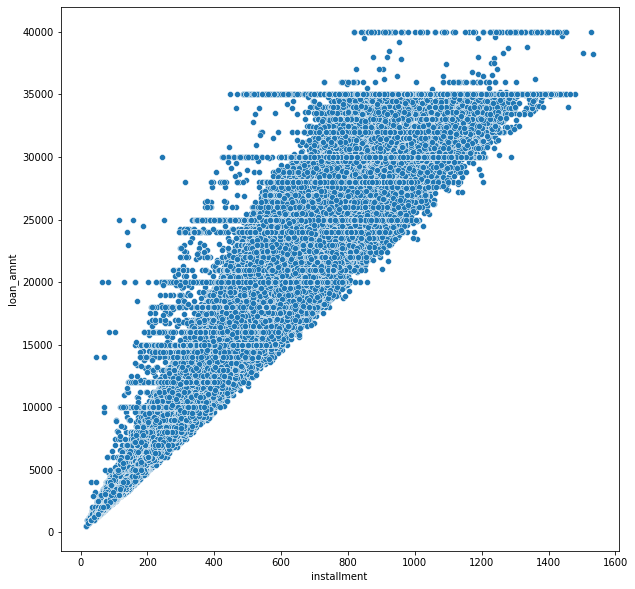

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='installment',y='loan_amnt',data=real_data)

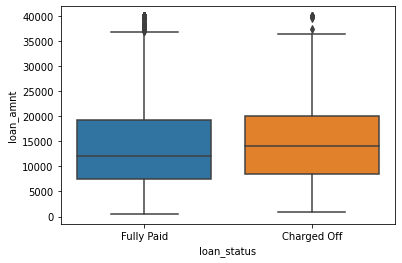

In [ ]:
sns.boxplot(y='loan_amnt',x='loan_status',data=real_data)

In [ ]:
real_data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [ ]:
real_data.head().T

,0,1,2,3,4
loan_amnt,10000,8000,15600,7200,24375
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
grade,B,B,B,A,C
sub_grade,B4,B5,B3,A2,C5
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
emp_length,10+ years,4 years,< 1 year,6 years,9 years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000,65000,43057,54000,55000


In [ ]:
gra=np.unique(real_data['grade'])

In [ ]:
gra

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [ ]:

su_gra=np.unique(real_data['sub_grade'])

In [ ]:
su_gra

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

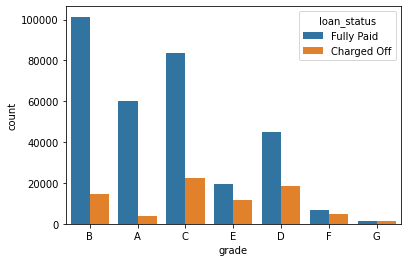

In [ ]:
sns.countplot(x='grade',data=real_data,hue='loan_status')

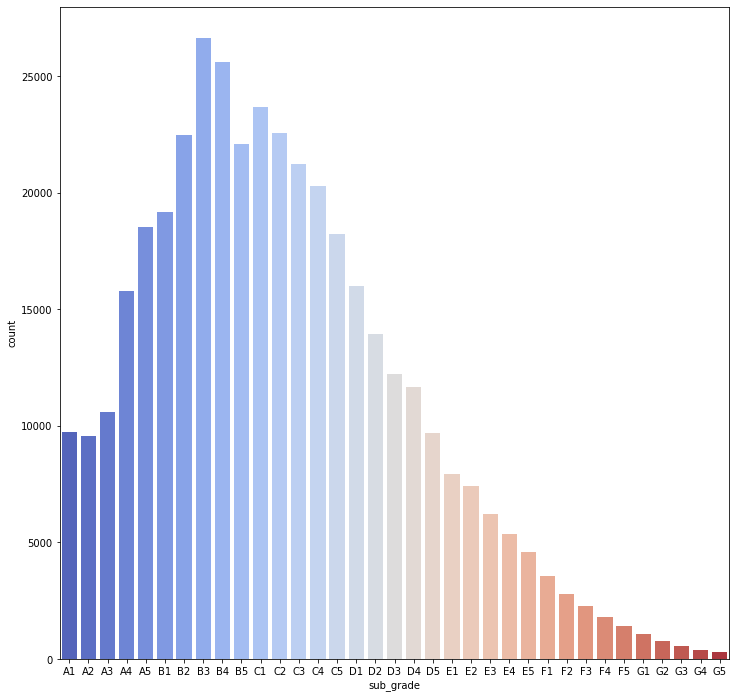

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x='sub_grade',data=real_data,order=su_gra,palette='coolwarm')

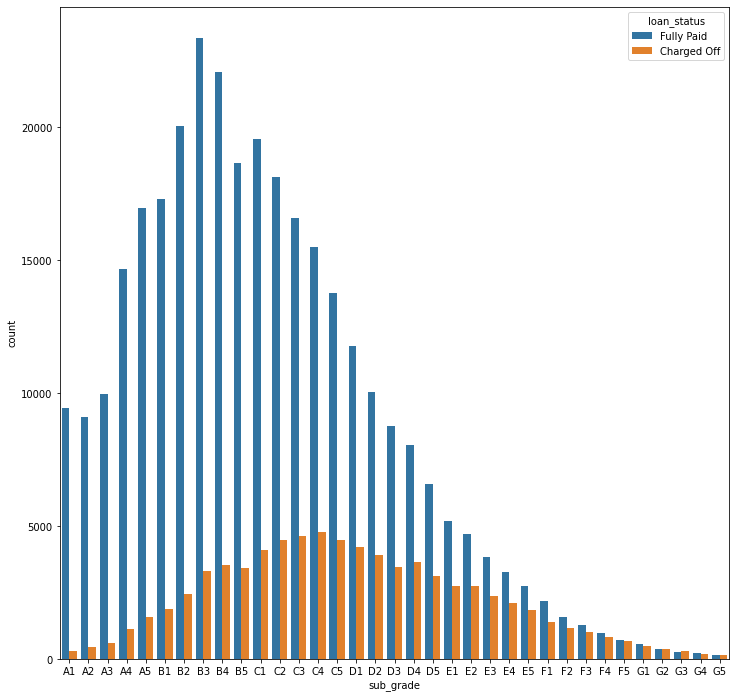

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x='sub_grade',data=real_data,order=su_gra,hue='loan_status');

In [ ]:
f_and_g=real_data[(real_data['grade']=='F')|(real_data['grade']=='G')]

In [ ]:
f_and_g['grade'].value_counts()

F    11772
G     3054
Name: grade, dtype: int64

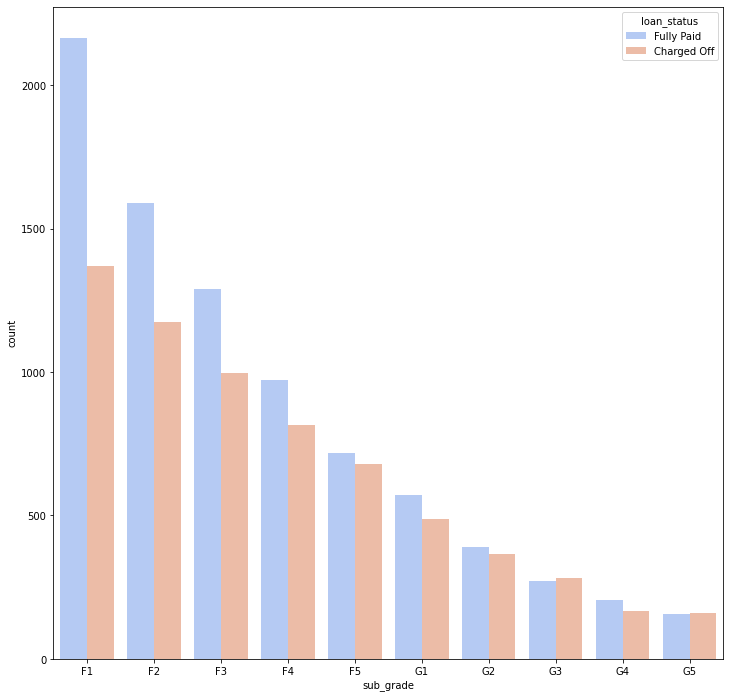

In [ ]:
plt.figure(figsize=(12,12))
orde=np.unique(f_and_g['sub_grade'])
sns.countplot(x='sub_grade',order=orde,data=real_data,hue='loan_status',palette='coolwarm')

In [ ]:
real_data['loan_status'].dtype

dtype('O')

In [ ]:
new=real_data['loan_status'].astype('category')

In [ ]:
new.cat.codes

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Length: 396030, dtype: int8

In [ ]:
real_data['loan_repaid']=real_data['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [ ]:
real_data['loan_repaid']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_repaid, Length: 396030, dtype: int64

In [ ]:
real_data['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

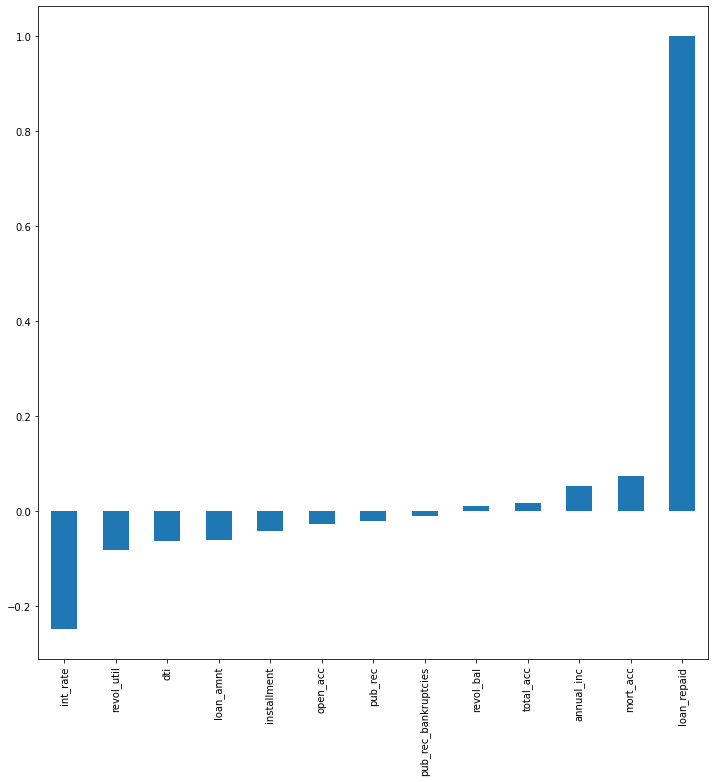

In [ ]:
plt.figure(figsize=(12,12))
real_data.corr()['loan_repaid'].sort_values(ascending=True).plot(kind='bar')

In [ ]:
len(real_data)

396030

In [ ]:
real_data.isna().sum()/len(real_data)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [ ]:
unique_titles=real_data['emp_title'].unique()

In [ ]:
real_data['emp_title'].value_counts()

Teacher                                     4389
Manager                                     4250
Registered Nurse                            1856
RN                                          1846
Supervisor                                  1830
                                            ... 
Capital Depot                                  1
Software QA & Development Engineer (NMS)       1
HAMMERMAN AND GAINER                           1
PMK BNC                                        1
Texas A&M University - Human Resources         1
Name: emp_title, Length: 173105, dtype: int64

In [ ]:
real_data.drop('emp_title',axis=1,inplace=True)

In [ ]:
sorted(real_data['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [ ]:
sorted(real_data['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [ ]:
len_order=['< 1 year',
           '1 year',
 
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years',
 ]

In [ ]:
len_order

['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

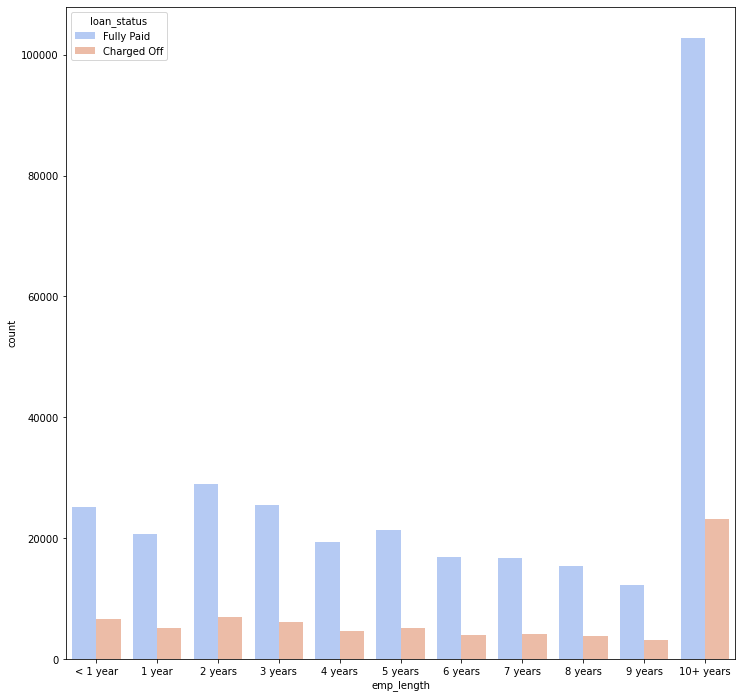

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x='emp_length',data=real_data,order=len_order,hue='loan_status',palette='coolwarm');

In [ ]:
real_data[real_data['loan_status']=='Charged Off'].groupby(by='emp_length').count()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
emp_length,,,,,,,,,,,,,,,,,,,,,,,,,,
1 year,5154,5154,5154,5154,5154,5154,5154,5154,5154,5154,5154,5154,5131,5154,5154,5154,5154,5154,5148,5154,5154,5154,4732,5141,5154,5154
10+ years,23215,23215,23215,23215,23215,23215,23215,23215,23215,23215,23215,23215,23109,23215,23215,23215,23215,23215,23200,23215,23215,23215,21883,23198,23215,23215
2 years,6924,6924,6924,6924,6924,6924,6924,6924,6924,6924,6924,6924,6900,6924,6924,6924,6924,6924,6918,6924,6924,6924,6383,6916,6924,6924
3 years,6182,6182,6182,6182,6182,6182,6182,6182,6182,6182,6182,6182,6150,6182,6182,6182,6182,6182,6179,6182,6182,6182,5660,6179,6182,6182
4 years,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4586,4608,4608,4608,4608,4608,4603,4608,4608,4608,4140,4598,4608,4608
5 years,5092,5092,5092,5092,5092,5092,5092,5092,5092,5092,5092,5092,5073,5092,5092,5092,5092,5092,5088,5092,5092,5092,4666,5090,5092,5092
6 years,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,3931,3943,3943,3943,3943,3943,3942,3943,3943,3943,3639,3940,3943,3943
7 years,4055,4055,4055,4055,4055,4055,4055,4055,4055,4055,4055,4055,4045,4055,4055,4055,4055,4055,4052,4055,4055,4055,3770,4052,4055,4055
8 years,3829,3829,3829,3829,3829,3829,3829,3829,3829,3829,3829,3829,3822,3829,3829,3829,3829,3829,3823,3829,3829,3829,3609,3826,3829,3829


In [ ]:
emp_co=real_data[real_data['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [ ]:
emp_fp=real_data[real_data['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']


In [ ]:
emp_rat=emp_co/(emp_fp+emp_co)

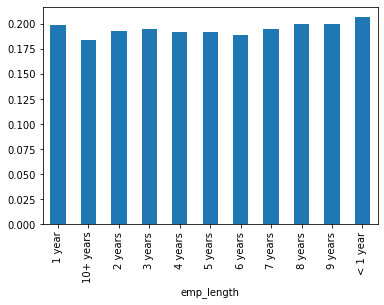

In [ ]:
emp_rat.plot(kind='bar');

In [ ]:
real_data.drop('emp_length',axis=1,inplace=True)
real_data.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [ ]:
real_data['title'].value_counts()

Debt consolidation                                         152472
Credit card refinancing                                     51487
Home improvement                                            15264
Other                                                       12930
Debt Consolidation                                          11608
                                                            ...  
House Credit                                                    1
My Child is Growing too fast! Need clothes, shoes, etc.         1
Invest w/ Confidence -  Personal Loan                           1
consolidating 2 bills into 1                                    1
Debtconsolidatation                                             1
Name: title, Length: 48817, dtype: int64

In [ ]:
real_data['title'].nunique()

48817

In [ ]:
real_data['purpose'].nunique()

14

In [ ]:
real_data.drop('title',axis=1,inplace=True)

In [ ]:
real_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


In [ ]:
real_data.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [ ]:
real_data['mort_acc'].head()

0    0.0
1    3.0
2    0.0
3    0.0
4    1.0
Name: mort_acc, dtype: float64

In [ ]:
real_data['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [ ]:
real_data['mort_acc'].nunique()

33

In [ ]:
jingle=real_data.corr()['mort_acc'].sort_values(ascending=True)

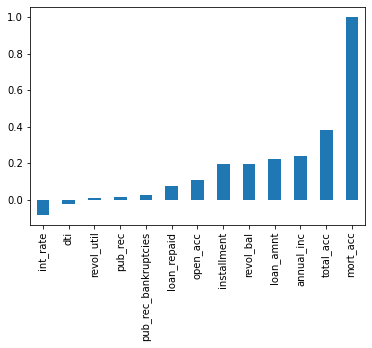

In [ ]:
jingle.plot(kind='bar')

In [ ]:
 real_data.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [ ]:
real_data['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [ ]:
tot_acnt_avg=real_data.groupby('total_acc').mean()['mort_acc']
tot_acnt_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [ ]:
tot_acnt_avg[124.0]

1.0

In [ ]:
np.array([4,9])*3

array([12, 27])

In [ ]:
def fill_values(total_acc,mort_acc):
  if np.isnan(mort_acc):
    return tot_acnt_avg[total_acc]
  else:
    return mort_acc

In [ ]:
real_data.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [ ]:
real_data.drop('mort_acc',axis=1,inplace=True)

In [ ]:
real_data.dropna(inplace=True)

In [ ]:
real_data.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [ ]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  

In [ ]:
show_non_ints=[]
for i in real_data.columns:
  if not pd.api.types.is_float_dtype(real_data[i].values):
    show_non_ints.append(i)

In [ ]:
show_non_ints

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address',
 'loan_repaid']

In [ ]:
real_data['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [ ]:
dumies=pd.get_dummies(real_data['sub_grade'],drop_first=True)

In [ ]:
real_data=pd.concat([real_data.drop('sub_grade',axis=1),dumies],axis=1)

In [ ]:
real_data.head().T

,0,1,2,3,4
loan_amnt,10000,8000,15600,7200,24375
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
grade,B,B,B,A,C
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000,65000,43057,54000,55000
verification_status,Not Verified,Not Verified,Source Verified,Not Verified,Verified
issue_d,Jan-2015,Jan-2015,Jan-2015,Nov-2014,Apr-2013
loan_status,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Charged Off


In [ ]:
new_dummi=pd.get_dummies(real_data[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)

real_data=pd.concat([real_data.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),new_dummi],axis=1)

In [ ]:
real_data.head().T

,0,1,2,3,4
loan_amnt,10000,8000,15600,7200,24375
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
grade,B,B,B,A,C
...,...,...,...,...,...
purpose_other,0,0,0,0,0
purpose_renewable_energy,0,0,0,0,0
purpose_small_business,0,0,0,0,0
purpose_vacation,1,0,0,0,0


In [ ]:
real_data['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [ ]:
real_data.replace(['NONE','ANY'],'OTHER',inplace=True)

In [ ]:
real_data['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [ ]:
nay_dummies=pd.get_dummies(real_data['home_ownership'],drop_first=True)

In [ ]:
real_data=pd.concat([real_data.drop('home_ownership',axis=1),nay_dummies],axis=1)

In [ ]:
real_data

,loan_amnt,term,int_rate,installment,grade,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,address,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT
0,10000.0,36 months,11.44,329.48,B,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,8000.0,36 months,11.99,265.68,B,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15600.0,36 months,10.49,506.97,B,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7200.0,36 months,6.49,220.65,A,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,24375.0,60 months,17.27,609.33,C,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
396026,21000.0,36 months,12.29,700.42,C,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36 months,9.99,161.32,B,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
396028,21000.0,60 months,15.31,503.02,C,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
real_data['address'].value_counts()

USNS Johnson\r\nFPO AE 05113                               8
USS Johnson\r\nFPO AE 48052                                8
USCGC Smith\r\nFPO AE 70466                                8
USS Smith\r\nFPO AP 70466                                  8
USNS Johnson\r\nFPO AP 48052                               7
                                                          ..
45634 Kevin Mall Apt. 743\r\nZunigaburgh, UT 00813         1
598 Hernandez Court Apt. 474\r\nNew Katherine, IA 22690    1
470 Brian Estates\r\nWest Gregory, VT 93700                1
297 Hernandez Roads\r\nLangfurt, HI 30723                  1
569 Taylor Spur Suite 645\r\nDestinyberg, HI 86630         1
Name: address, Length: 392898, dtype: int64

In [ ]:
real_data['zipcode']=real_data['address'].apply(lambda add: add[-5:])

In [ ]:
real_data['zipcode']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zipcode, Length: 395219, dtype: object

In [ ]:
real_data['zipcode'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zipcode, dtype: int64

In [ ]:
real_data['zipcode'].nunique()

10

In [ ]:
na_dummis=pd.get_dummies(real_data['zipcode'],drop_first=False)

In [ ]:
real_data=pd.concat([real_data.drop('zipcode',axis=1),na_dummis],axis=1)

In [ ]:
real_data.drop('address',axis=1,inplace=True)

In [ ]:
real_data.head().T

,0,1,2,3,4
loan_amnt,10000,8000,15600,7200,24375
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
grade,B,B,B,A,C
...,...,...,...,...,...
30723,0,0,0,0,0
48052,0,0,0,0,0
70466,0,0,0,0,0
86630,0,0,0,0,0


In [ ]:
real_data.drop('issue_d',axis=1,inplace=True)

In [ ]:
real_data['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [ ]:
reara=real_data.copy()

In [ ]:
reara['earliest_year']=reara['earliest_cr_line'].apply(lambda year:year[-4:])

In [ ]:
reara['earliest_year']=reara['earliest_year'].astype(int)

In [ ]:
reara['earliest_year'].dtype

dtype('int64')

In [ ]:
reara.drop('earliest_cr_line',axis=1,inplace=True)

In [ ]:
reara['earliest_year']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_year, Length: 395219, dtype: int64

In [ ]:
reara['earliest_year'].nunique()

65

In [ ]:
reara.drop('loan_status',axis=1,inplace=True)

In [ ]:
reara.drop('grade',axis=1,inplace=True)

In [ ]:
reara.drop('term',axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scala=MinMaxScaler()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=reara.drop('loan_repaid',axis=1).values
y=reara['loan_repaid'].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [ ]:
x_train=scala.fit_transform(x_train)


In [ ]:
x_test=scala.transform(x_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
model=Sequential()

In [ ]:
x_train.shape

(316175, 77)

In [ ]:
model.add(Dense(units=77,activation='relu'))
model.add(Dense(units=39,activation='relu'))
model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
model.fit(x_train,y_train,epochs=25,validation_data=(x_test,y_test))

Epoch 1/25
9881/9881 [==============================] - 20s 2ms/step - loss: 0.2827 - val_loss: 0.2641
Epoch 2/25
9881/9881 [==============================] - 18s 2ms/step - loss: 0.2609 - val_loss: 0.2634
Epoch 3/25
9881/9881 [==============================] - 19s 2ms/step - loss: 0.2594 - val_loss: 0.2622
Epoch 4/25
9881/9881 [==============================] - 18s 2ms/step - loss: 0.2591 - val_loss: 0.2631
Epoch 5/25
9881/9881 [==============================] - 18s 2ms/step - loss: 0.2586 - val_loss: 0.2613
Epoch 6/25
9881/9881 [==============================] - 18s 2ms/step - loss: 0.2585 - val_loss: 0.2616
Epoch 7/25
9881/9881 [==============================] - 18s 2ms/step - loss: 0.2576 - val_loss: 0.2621
Epoch 8/25
9881/9881 [==============================] - 18s 2ms/step - loss: 0.2563 - val_loss: 0.2611
Epoch 9/25
9881/9881 [==============================] - 18s 2ms/step - loss: 0.2561 - val_loss: 0.2610
Epoch 10/25
9881/9881 [==============================] - 18s 2ms/step - l

In [ ]:
losses=pd.DataFrame(model.history.history)

In [ ]:
losses

,loss,val_loss
0,0.267125,0.264119
1,0.260821,0.263442
2,0.259711,0.262189
3,0.259046,0.263083
4,0.258366,0.261299
5,0.257914,0.261567
6,0.257374,0.262053
7,0.257005,0.261053
8,0.256649,0.260978
9,0.256200,0.261275


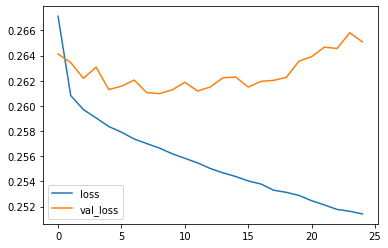

In [ ]:
losses.plot()

In [ ]:
preds=model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.95      0.45      0.62     15658
           1       0.88      0.99      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.89      0.89      0.87     79044



In [ ]:
confusion_matrix(y_test,preds)

array([[ 7111,  8547],
       [  353, 63033]])

In [ ]:
import random
random.seed(101)
random_number=random.randint(0,len(reara.columns)-2)
client=reara.drop('loan_repaid',axis=1).iloc[random_number]

In [ ]:
client_n=scala.transform(client.values.reshape(1,77))

In [ ]:
model.predict(client_n)

array([[1.]], dtype=float32)

In [ ]:
reara['loan_repaid'][random_number]

1